In [22]:
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
import faiss
from sklearn.neighbors import KNeighborsClassifier
import torch
import timm
from torchvision import transforms
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
meta_path = r'C:\Users\LENOVO\Desktop\AnimalCELF25\metadata.csv'
metaData = pd.read_csv(meta_path)

In [6]:
metaData

image_id            identity  \
0             0  LynxID2025_lynx_37   
1             1  LynxID2025_lynx_37   
2             2  LynxID2025_lynx_49   
3             3                 NaN   
4             4  LynxID2025_lynx_13   
...         ...                 ...   
15204     15204                 NaN   
15205     15205                 NaN   
15206     15206                 NaN   
15207     15207                 NaN   
15208     15208                 NaN   

                                                    path        date  \
0      images/LynxID2025/database/000f9ee1aad063a4485...         NaN   
1      images/LynxID2025/database/0020edb6689e9f78462...         NaN   
2      images/LynxID2025/database/003152e4145b5b69400...         NaN   
3      images/LynxID2025/query/003b89301c7b9f6d18f722...         NaN   
4      images/LynxID2025/database/003c3f82011e9c3f849...         NaN   
...                                                  ...         ...   
15204  images/SeaTurtleID2022/query/images/fecd2dfed0...  2024-06-07   
15205  images/SeaTurtleID2022/query/images/ff1a0c812b...  2023-06-28   
15206  images/SeaTurtleID2022/query/images/ff22f1cfa6...  2024-06-09   
15207  images/SeaTurtleID2022/query/images/ff5d5116d1...  2023-06-21   
15208  images/SeaTurtleID2022/query/images/ff7f522363...  2023-06-13   

      orientation            species     split          dataset  
0           right               lynx  database       LynxID2025  
1            left               lynx  database       LynxID2025  
2            left               lynx  database       LynxID2025  
3            back               lynx     query       LynxID2025  
4           right               lynx  database       LynxID2025  
...           ...                ...       ...              ...  
15204         NaN  loggerhead turtle     query  SeaTurtleID2022  
15205         NaN  loggerhead turtle     query  SeaTurtleID2022  
15206         NaN  loggerhead turtle     query  SeaTurtleID2022  
15207         NaN  loggerhead turtle     query  SeaTurtleID2022  
15208         NaN  loggerhead turtle     query  SeaTurtleID2022  

[15209 rows x 8 columns]

In [7]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15209 entries, 0 to 15208
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_id     15209 non-null  int64 
 1   identity     13074 non-null  object
 2   path         15209 non-null  object
 3   date         11302 non-null  object
 4   orientation  14506 non-null  object
 5   species      13821 non-null  object
 6   split        15209 non-null  object
 7   dataset      15209 non-null  object
dtypes: int64(1), object(7)
memory usage: 950.7+ KB


In [8]:
lynxData = metaData[metaData.dataset == 'LynxID2025'].copy()
lynxData = lynxData[lynxData.split == 'database']
lynxData = lynxData[['identity', 'path']]

In [9]:
lynxData

identity                                               path
0     LynxID2025_lynx_37  images/LynxID2025/database/000f9ee1aad063a4485...
1     LynxID2025_lynx_37  images/LynxID2025/database/0020edb6689e9f78462...
2     LynxID2025_lynx_49  images/LynxID2025/database/003152e4145b5b69400...
4     LynxID2025_lynx_13  images/LynxID2025/database/003c3f82011e9c3f849...
6     LynxID2025_lynx_07  images/LynxID2025/database/0051adb5bd1b63867b9...
...                  ...                                                ...
3895  LynxID2025_lynx_91  images/LynxID2025/database/ff968c75d2c8b8b37d4...
3896  LynxID2025_lynx_32  images/LynxID2025/database/ffb875184fefa89a9dc...
3898  LynxID2025_lynx_62  images/LynxID2025/database/ffc5b76999fe8bc20ce...
3899  LynxID2025_lynx_54  images/LynxID2025/database/ffd7b56e60a2b001ac1...
3901  LynxID2025_lynx_62  images/LynxID2025/database/fff39fdf8b0af60abda...

[2957 rows x 2 columns]

In [10]:
root = r'C:\Users\LENOVO\Desktop\AnimalCELF25'
dst = r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\LynxID2025\database\images'

In [ ]:
for identity in lynxData.identity.unique():
    Id = identity.replace("ID2025_lynx", "")
    id_folder_path = os.path.join(dst, Id)
    os.makedirs(id_folder_path, exist_ok=True)
    
    id_dataset_paths = lynxData[lynxData.identity == identity].path
    print(f"\nProcessing identity {identity} → Folder: {Id} ({len(id_dataset_paths)} images)")

    for path in id_dataset_paths:
        img_path = os.path.join(root, path)
        try:
            if os.path.isfile(img_path):
                shutil.move(img_path, id_folder_path)
            else:
                print(f"Skipped (not found): {img_path}")
        except Exception as e:
            print(f"Error copying {img_path}: {e}")


Processing identity LynxID2025_lynx_37 → Folder: Lynx_37 (45 images)

Processing identity LynxID2025_lynx_49 → Folder: Lynx_49 (353 images)

Processing identity LynxID2025_lynx_13 → Folder: Lynx_13 (26 images)

Processing identity LynxID2025_lynx_07 → Folder: Lynx_07 (37 images)

Processing identity LynxID2025_lynx_95 → Folder: Lynx_95 (68 images)

Processing identity LynxID2025_lynx_32 → Folder: Lynx_32 (256 images)

Processing identity LynxID2025_lynx_60 → Folder: Lynx_60 (59 images)

Processing identity LynxID2025_lynx_24 → Folder: Lynx_24 (2 images)

Processing identity LynxID2025_lynx_43 → Folder: Lynx_43 (234 images)

Processing identity LynxID2025_lynx_54 → Folder: Lynx_54 (80 images)

Processing identity LynxID2025_lynx_05 → Folder: Lynx_05 (151 images)

Processing identity LynxID2025_lynx_16 → Folder: Lynx_16 (36 images)

Processing identity LynxID2025_lynx_41 → Folder: Lynx_41 (20 images)

Processing identity LynxID2025_lynx_81 → Folder: Lynx_81 (7 images)

Processing identi

In [11]:
salamanderData = metaData[metaData.dataset == 'SalamanderID2025'].copy()
salamanderData = salamanderData[salamanderData.split == 'database']
salamanderData = salamanderData[['identity', 'path']]

In [12]:
salamanderData

identity                                               path
3903    SalamanderID2025_2  images/SalamanderID2025/database/images/eafd41...
3904    SalamanderID2025_2  images/SalamanderID2025/database/images/e80dc6...
3905    SalamanderID2025_2  images/SalamanderID2025/database/images/836157...
3906    SalamanderID2025_2  images/SalamanderID2025/database/images/8f4b82...
3907    SalamanderID2025_3  images/SalamanderID2025/database/images/56d75a...
...                    ...                                                ...
5286  SalamanderID2025_659  images/SalamanderID2025/database/images/db14b8...
5287  SalamanderID2025_661  images/SalamanderID2025/database/images/d8e174...
5288  SalamanderID2025_662  images/SalamanderID2025/database/images/322943...
5289  SalamanderID2025_663  images/SalamanderID2025/database/images/6eda4b...
5290  SalamanderID2025_664  images/SalamanderID2025/database/images/89df5b...

[1388 rows x 2 columns]

In [32]:
root = r'C:\Users\LENOVO\Desktop\AnimalCELF25'
dst = r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\SalamanderID2025\database\images'

for identity in salamanderData.identity.unique():
    Id = identity.replace("ID2025", "")
    id_folder_path = os.path.join(dst, Id)
    os.makedirs(id_folder_path, exist_ok=True)
    
    id_dataset_paths = salamanderData[salamanderData.identity == identity].path
    print(f"\nProcessing identity {identity} → Folder: {Id} ({len(id_dataset_paths)} images)")

    for path in id_dataset_paths:
        img_path = os.path.join(root, path)
        try:
            if os.path.isfile(img_path):
                shutil.move(img_path, id_folder_path)
            else:
                print(f"Skipped (not found): {img_path}")
        except Exception as e:
            print(f"Error copying {img_path}: {e}")


Processing identity SalamanderID2025_2 → Folder: Salamander_2 (4 images)

Processing identity SalamanderID2025_3 → Folder: Salamander_3 (3 images)

Processing identity SalamanderID2025_4 → Folder: Salamander_4 (4 images)

Processing identity SalamanderID2025_5 → Folder: Salamander_5 (4 images)

Processing identity SalamanderID2025_6 → Folder: Salamander_6 (2 images)

Processing identity SalamanderID2025_7 → Folder: Salamander_7 (1 images)

Processing identity SalamanderID2025_8 → Folder: Salamander_8 (1 images)

Processing identity SalamanderID2025_10 → Folder: Salamander_10 (10 images)

Processing identity SalamanderID2025_11 → Folder: Salamander_11 (9 images)

Processing identity SalamanderID2025_12 → Folder: Salamander_12 (8 images)

Processing identity SalamanderID2025_13 → Folder: Salamander_13 (2 images)

Processing identity SalamanderID2025_14 → Folder: Salamander_14 (5 images)

Processing identity SalamanderID2025_15 → Folder: Salamander_15 (9 images)

Processing identity Sala

In [34]:
shutil.move(src=r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\SeaTurtleID2022\database\turtles-data\data\images',dst=r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\SeaTurtleID2022\database')

'C:\\Users\\LENOVO\\Desktop\\AnimalCELF25\\images\\SeaTurtleID2022\\database\\images'

In [13]:
database_path_lynx = r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\LynxID2025\database\images'
database_path_salamander = r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\SalamanderID2025\database\images'
database_path_turtle = r'C:\Users\LENOVO\Desktop\AnimalCELF25\images\SeaTurtleID2022\database\images'

In [71]:
for path in os.listdir(database_path_lynx):
    path_rename = path.replace("_", "ID2025_lynx_")
    new_path = os.path.join(database_path_lynx, path_rename)
    old_path = os.path.join(database_path_lynx, path)
    os.rename(old_path, new_path)

In [72]:
for path in os.listdir(database_path_salamander):
    path_rename = path.replace("_", "ID2025_")
    new_path = os.path.join(database_path_salamander, path_rename)
    old_path = os.path.join(database_path_salamander, path)
    os.rename(old_path, new_path)

#### **Helper Functions**

In [14]:
def preprocess_image(img_path, target_size=(224, 224)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    return img_array

In [91]:
def load_images(path, PIL = False):
    ids = os.listdir(path)
    images = []
    labels = []
    for id in ids:
        img_dir = os.path.join(path, id)
        img_path = os.listdir(img_dir)
        print(f'Processing {id}')
        for img in img_path:
            image = preprocess_image(os.path.join(img_dir, img))
            if PIL:
                image = Image.fromarray(image.astype('uint8'))
                images.append(image)
            else:
                images.append(image)
            labels.append(id)
    
    return (images, labels) if PIL else (np.array(images), labels)

In [40]:
def visualize_tsne(embeddings, labels, title, perplexity=30, max_iter=1000):
    """
    embeddings: numpy array of shape (N, D)
    labels: list of N labels (strings or ints)
    """
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=max_iter, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    # Plot
    plt.figure(figsize=(20, 8))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='deep', s=60)
    plt.title(title)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize='small')
    plt.grid(True)
    plt.show()

#### **EfficientNetv2L**

In [16]:
efficient_model = tf.keras.applications.EfficientNetV2L(weights="imagenet", include_top=False, pooling="avg")

def extract_efficient_embedding(images,batch_size=32):
    img_array = tf.keras.applications.efficientnet_v2.preprocess_input(images)
    embeddings = efficient_model.predict(img_array, batch_size=batch_size, verbose=0)
    return embeddings

#### **Vision Transformer**

In [107]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.reset_classifier(0)  
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

def extract_vit_embedding(images):
    embeddings = []

    for image in images:
        img_tensor = transform(image).unsqueeze(0)
        with torch.no_grad():
            tokens = model.forward_features(img_tensor)
            cls_token = tokens[:, 0, :]  
            embeddings.append(cls_token.cpu().numpy())

    return np.vstack(embeddings)

#### **ConvNeXt**

In [104]:
model = tf.keras.applications.ConvNeXtBase(include_top=False, pooling='avg', weights='imagenet')

def extract_convnext_embedding(images):
    img = tf.keras.applications.convnext.preprocess_input(images)
    embedding = model.predict(img)
    return embedding


In [44]:
lynx_image, lynx_label = load_images(database_path_lynx)

Processing LynxID2025_lynx_00
Processing LynxID2025_lynx_01
Processing LynxID2025_lynx_02
Processing LynxID2025_lynx_03
Processing LynxID2025_lynx_04
Processing LynxID2025_lynx_05
Processing LynxID2025_lynx_06
Processing LynxID2025_lynx_07
Processing LynxID2025_lynx_08
Processing LynxID2025_lynx_09
Processing LynxID2025_lynx_11
Processing LynxID2025_lynx_13
Processing LynxID2025_lynx_14
Processing LynxID2025_lynx_15
Processing LynxID2025_lynx_16
Processing LynxID2025_lynx_17
Processing LynxID2025_lynx_18
Processing LynxID2025_lynx_24
Processing LynxID2025_lynx_25
Processing LynxID2025_lynx_26
Processing LynxID2025_lynx_27
Processing LynxID2025_lynx_28
Processing LynxID2025_lynx_29
Processing LynxID2025_lynx_31
Processing LynxID2025_lynx_32
Processing LynxID2025_lynx_33
Processing LynxID2025_lynx_34
Processing LynxID2025_lynx_35
Processing LynxID2025_lynx_36
Processing LynxID2025_lynx_37
Processing LynxID2025_lynx_38
Processing LynxID2025_lynx_39
Processing LynxID2025_lynx_40
Processing

In [51]:
lynx_image_vit, _ = load_images(database_path_lynx, PIL=True)

Processing LynxID2025_lynx_00
Processing LynxID2025_lynx_01
Processing LynxID2025_lynx_02
Processing LynxID2025_lynx_03
Processing LynxID2025_lynx_04
Processing LynxID2025_lynx_05
Processing LynxID2025_lynx_06
Processing LynxID2025_lynx_07
Processing LynxID2025_lynx_08
Processing LynxID2025_lynx_09
Processing LynxID2025_lynx_11
Processing LynxID2025_lynx_13
Processing LynxID2025_lynx_14
Processing LynxID2025_lynx_15
Processing LynxID2025_lynx_16
Processing LynxID2025_lynx_17
Processing LynxID2025_lynx_18
Processing LynxID2025_lynx_24
Processing LynxID2025_lynx_25
Processing LynxID2025_lynx_26
Processing LynxID2025_lynx_27
Processing LynxID2025_lynx_28
Processing LynxID2025_lynx_29
Processing LynxID2025_lynx_31
Processing LynxID2025_lynx_32
Processing LynxID2025_lynx_33
Processing LynxID2025_lynx_34
Processing LynxID2025_lynx_35
Processing LynxID2025_lynx_36
Processing LynxID2025_lynx_37
Processing LynxID2025_lynx_38
Processing LynxID2025_lynx_39
Processing LynxID2025_lynx_40
Processing

In [52]:
type(lynx_image_vit[0])

PIL.Image.Image

In [ ]:
lynx_embed_efficient = extract_efficient_embedding(lynx_image)
lynx_embed_conv = extract_convnext_embedding(lynx_image)

In [67]:
lynx_embed_vit = extract_vit_embedding(lynx_image_vit)

In [68]:
print(lynx_embed_efficient.shape)
print(lynx_embed_conv.shape)
print(lynx_embed_vit.shape)

(2957, 1280)
(2957, 1024)
(2957, 768)


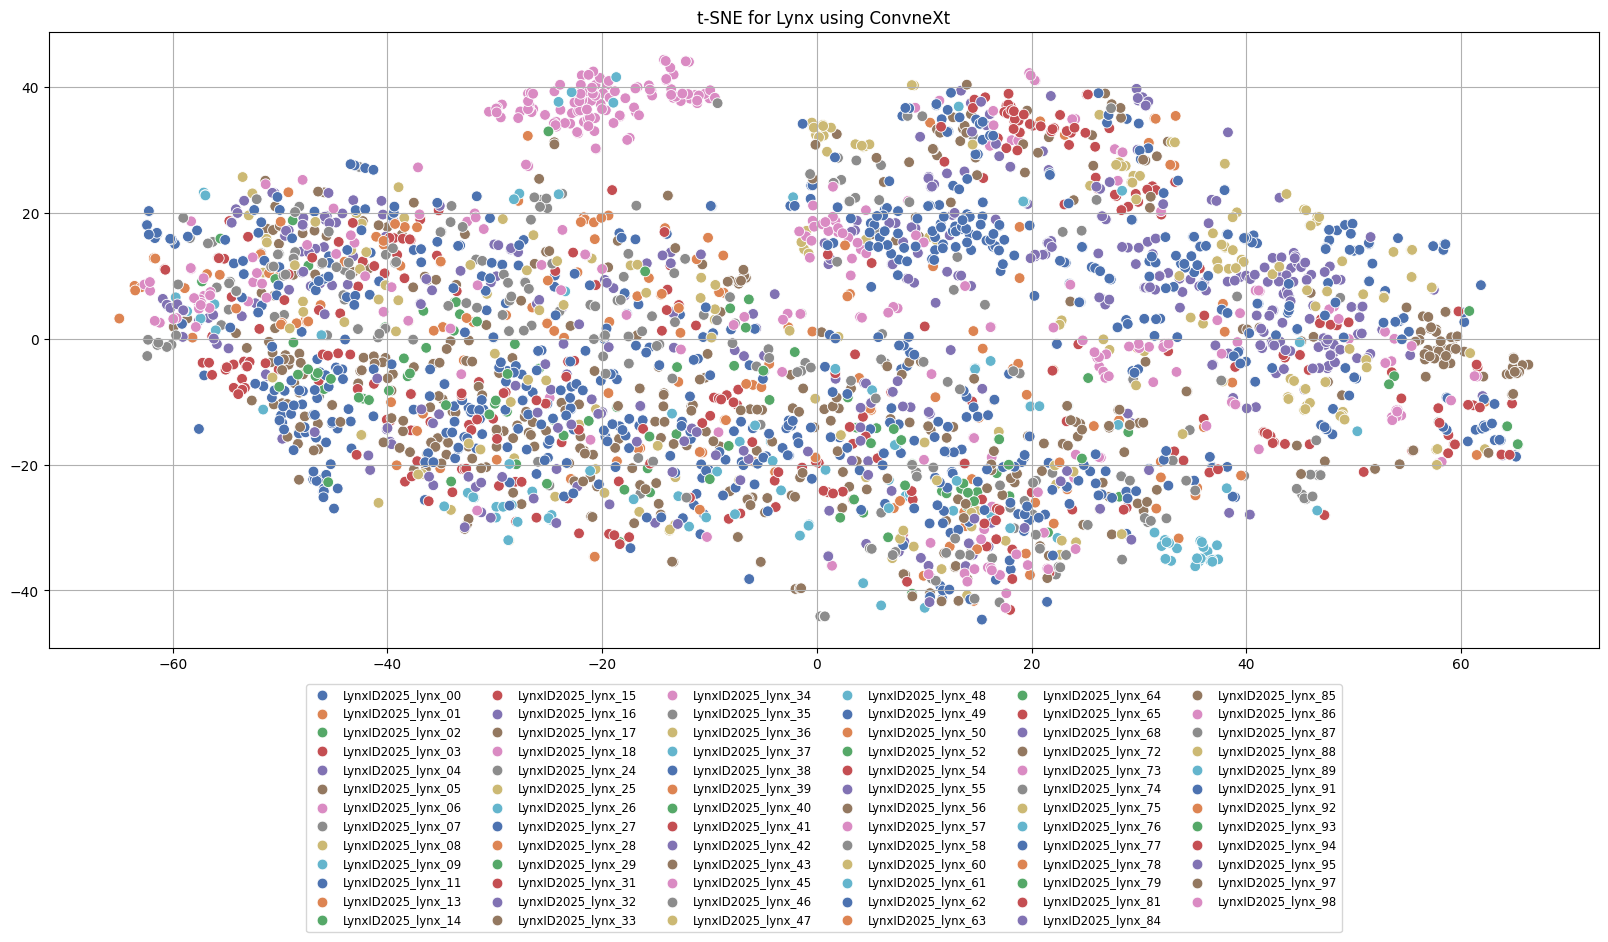

In [70]:
visualize_tsne(lynx_embed_conv, labels=lynx_label, title='t-SNE for Lynx using ConvneXt')

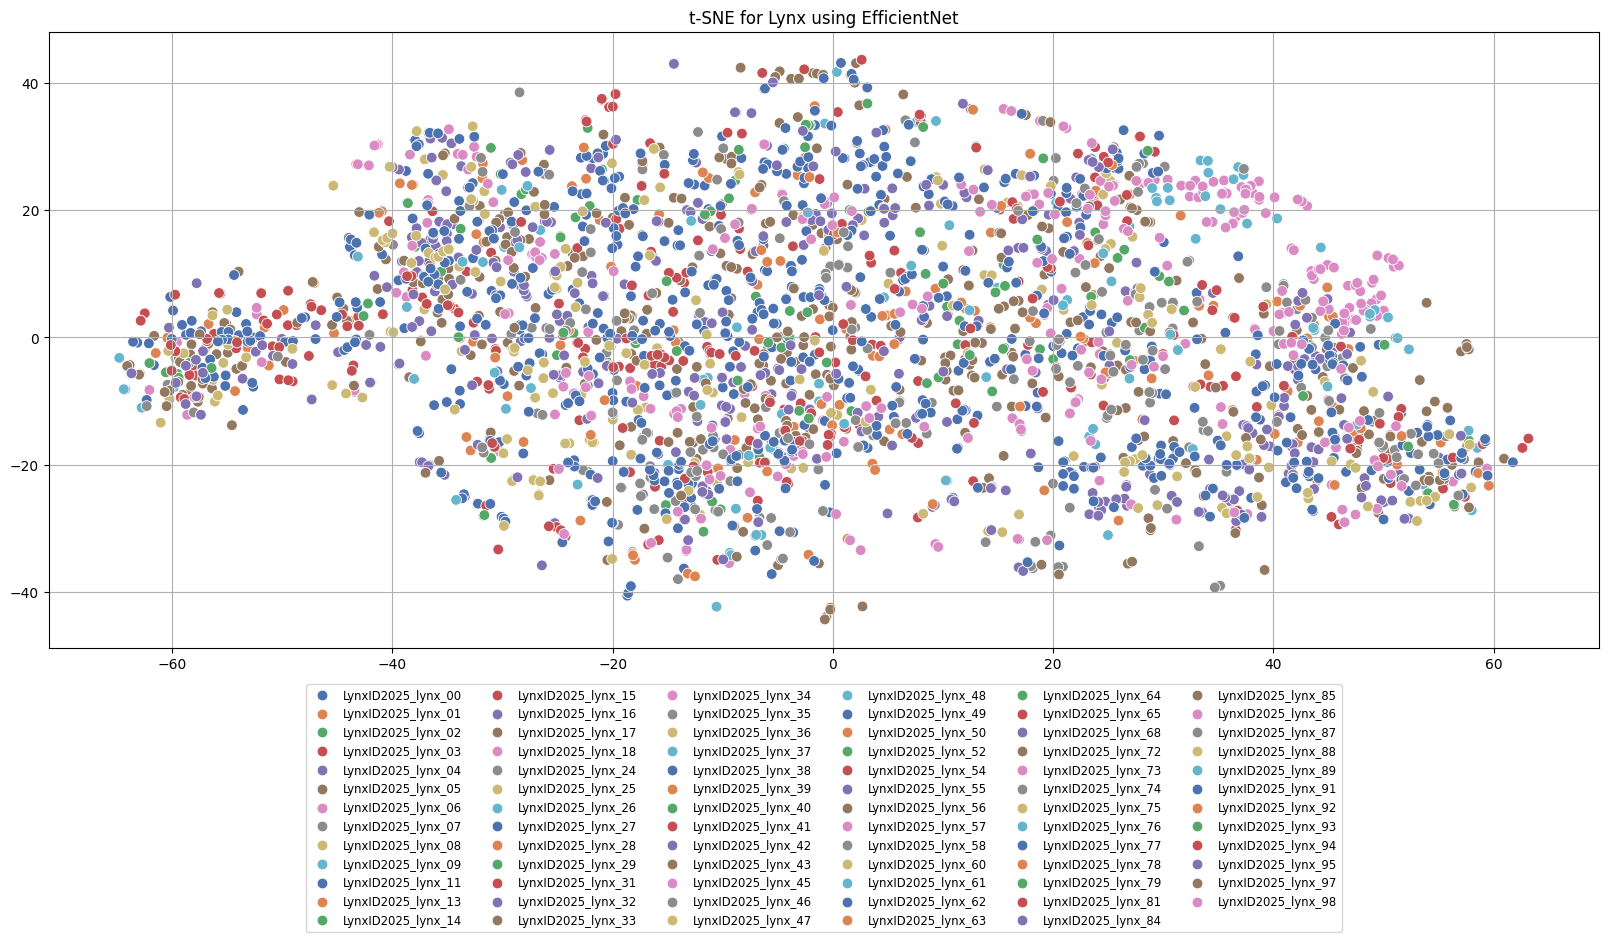

In [71]:
visualize_tsne(lynx_embed_efficient, labels=lynx_label, title='t-SNE for Lynx using EfficientNet')

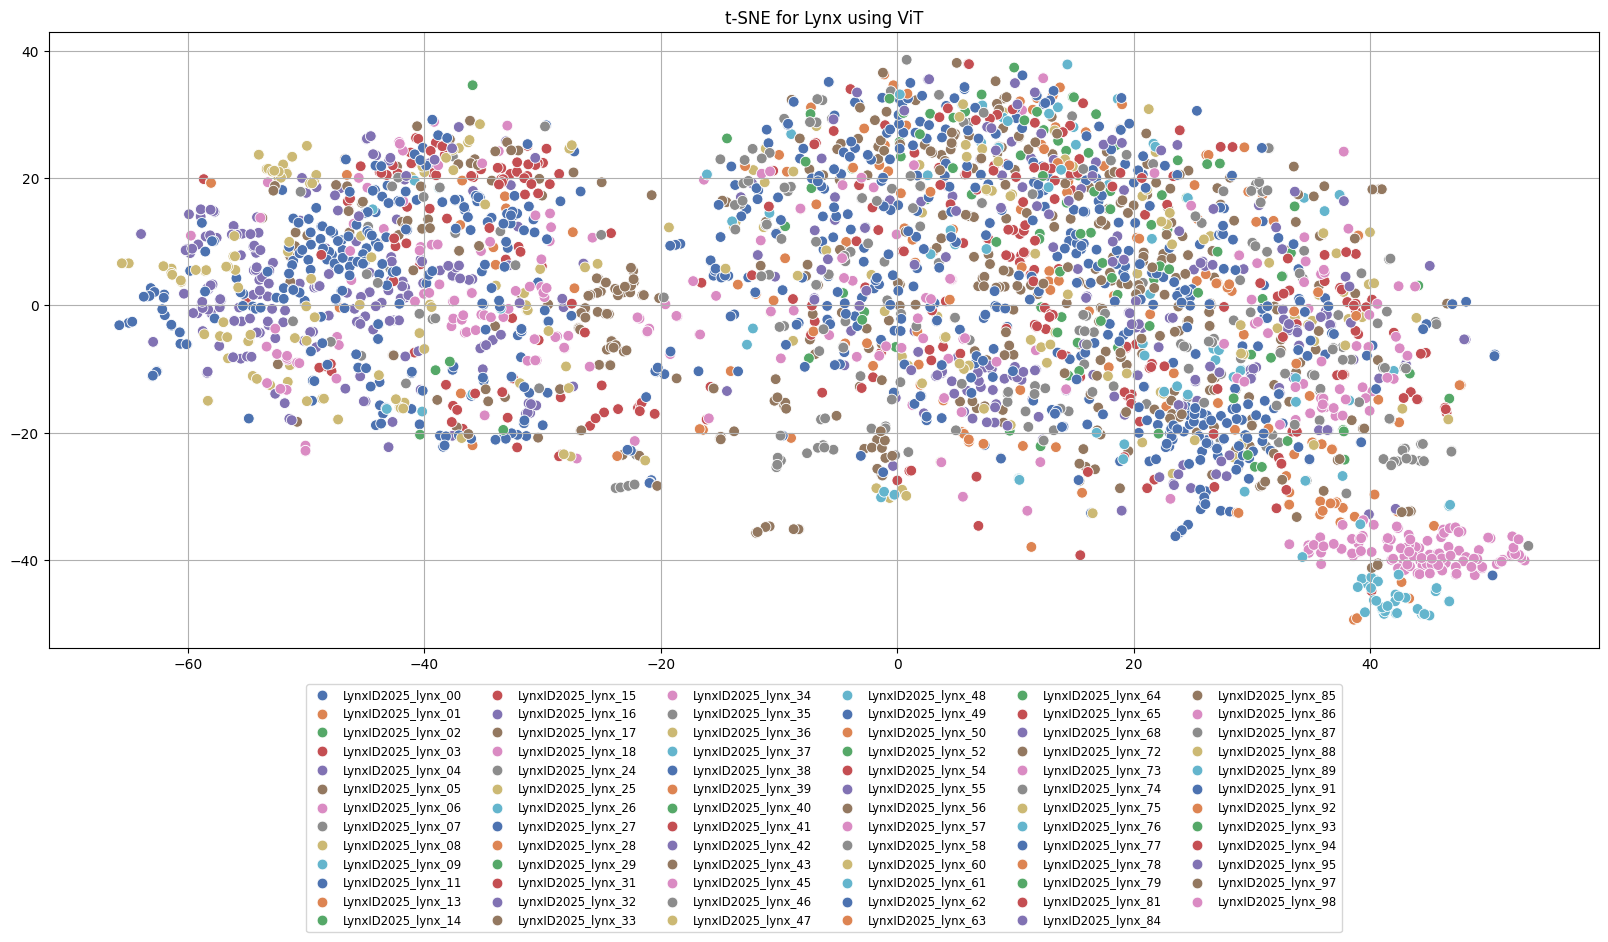

In [69]:
visualize_tsne(lynx_embed_vit, lynx_label, title='t-SNE for Lynx using ViT')

In [ ]:
salamander_image, salamander_label = load_images(database_path_salamander)
salamander_image_vit, _ = load_images(database_path_salamander, PIL=True)

In [ ]:
salamander_embed_efficient = extract_efficient_embedding(salamander_image)
salamander_embed_conv = extract_convnext_embedding(salamander_image)

In [98]:
salamander_embed_vit = extract_vit_embedding(salamander_image_vit)

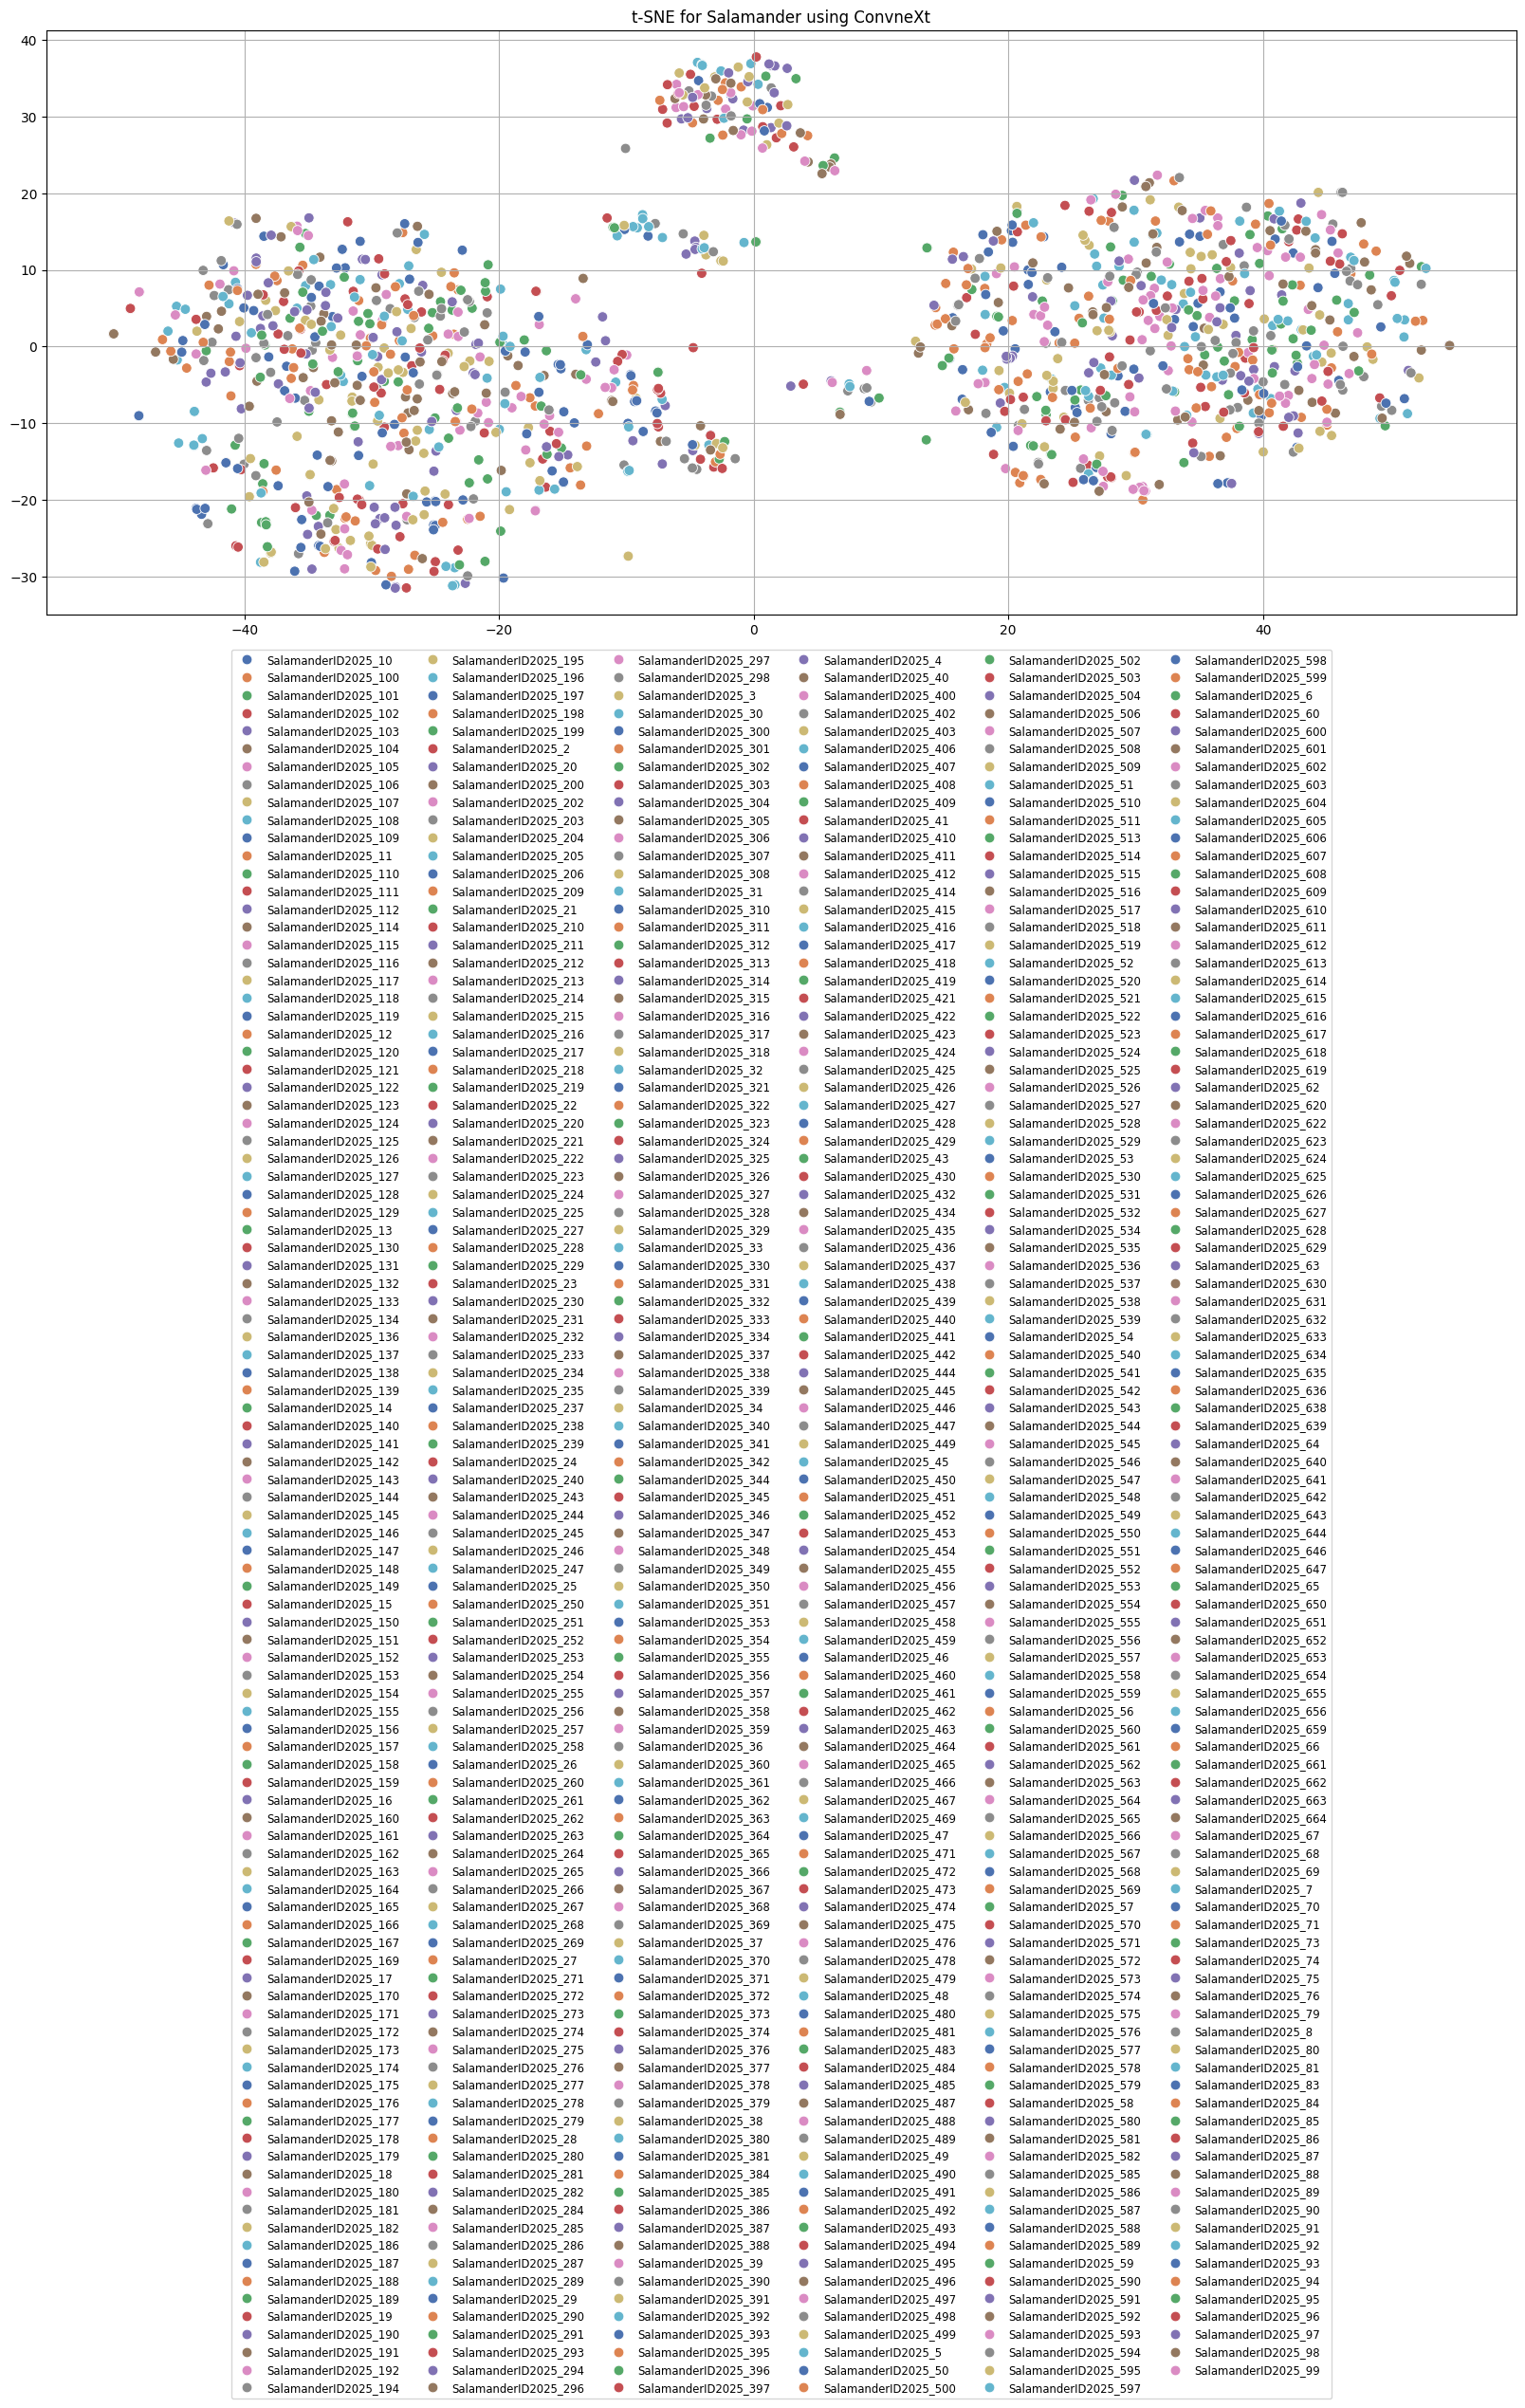

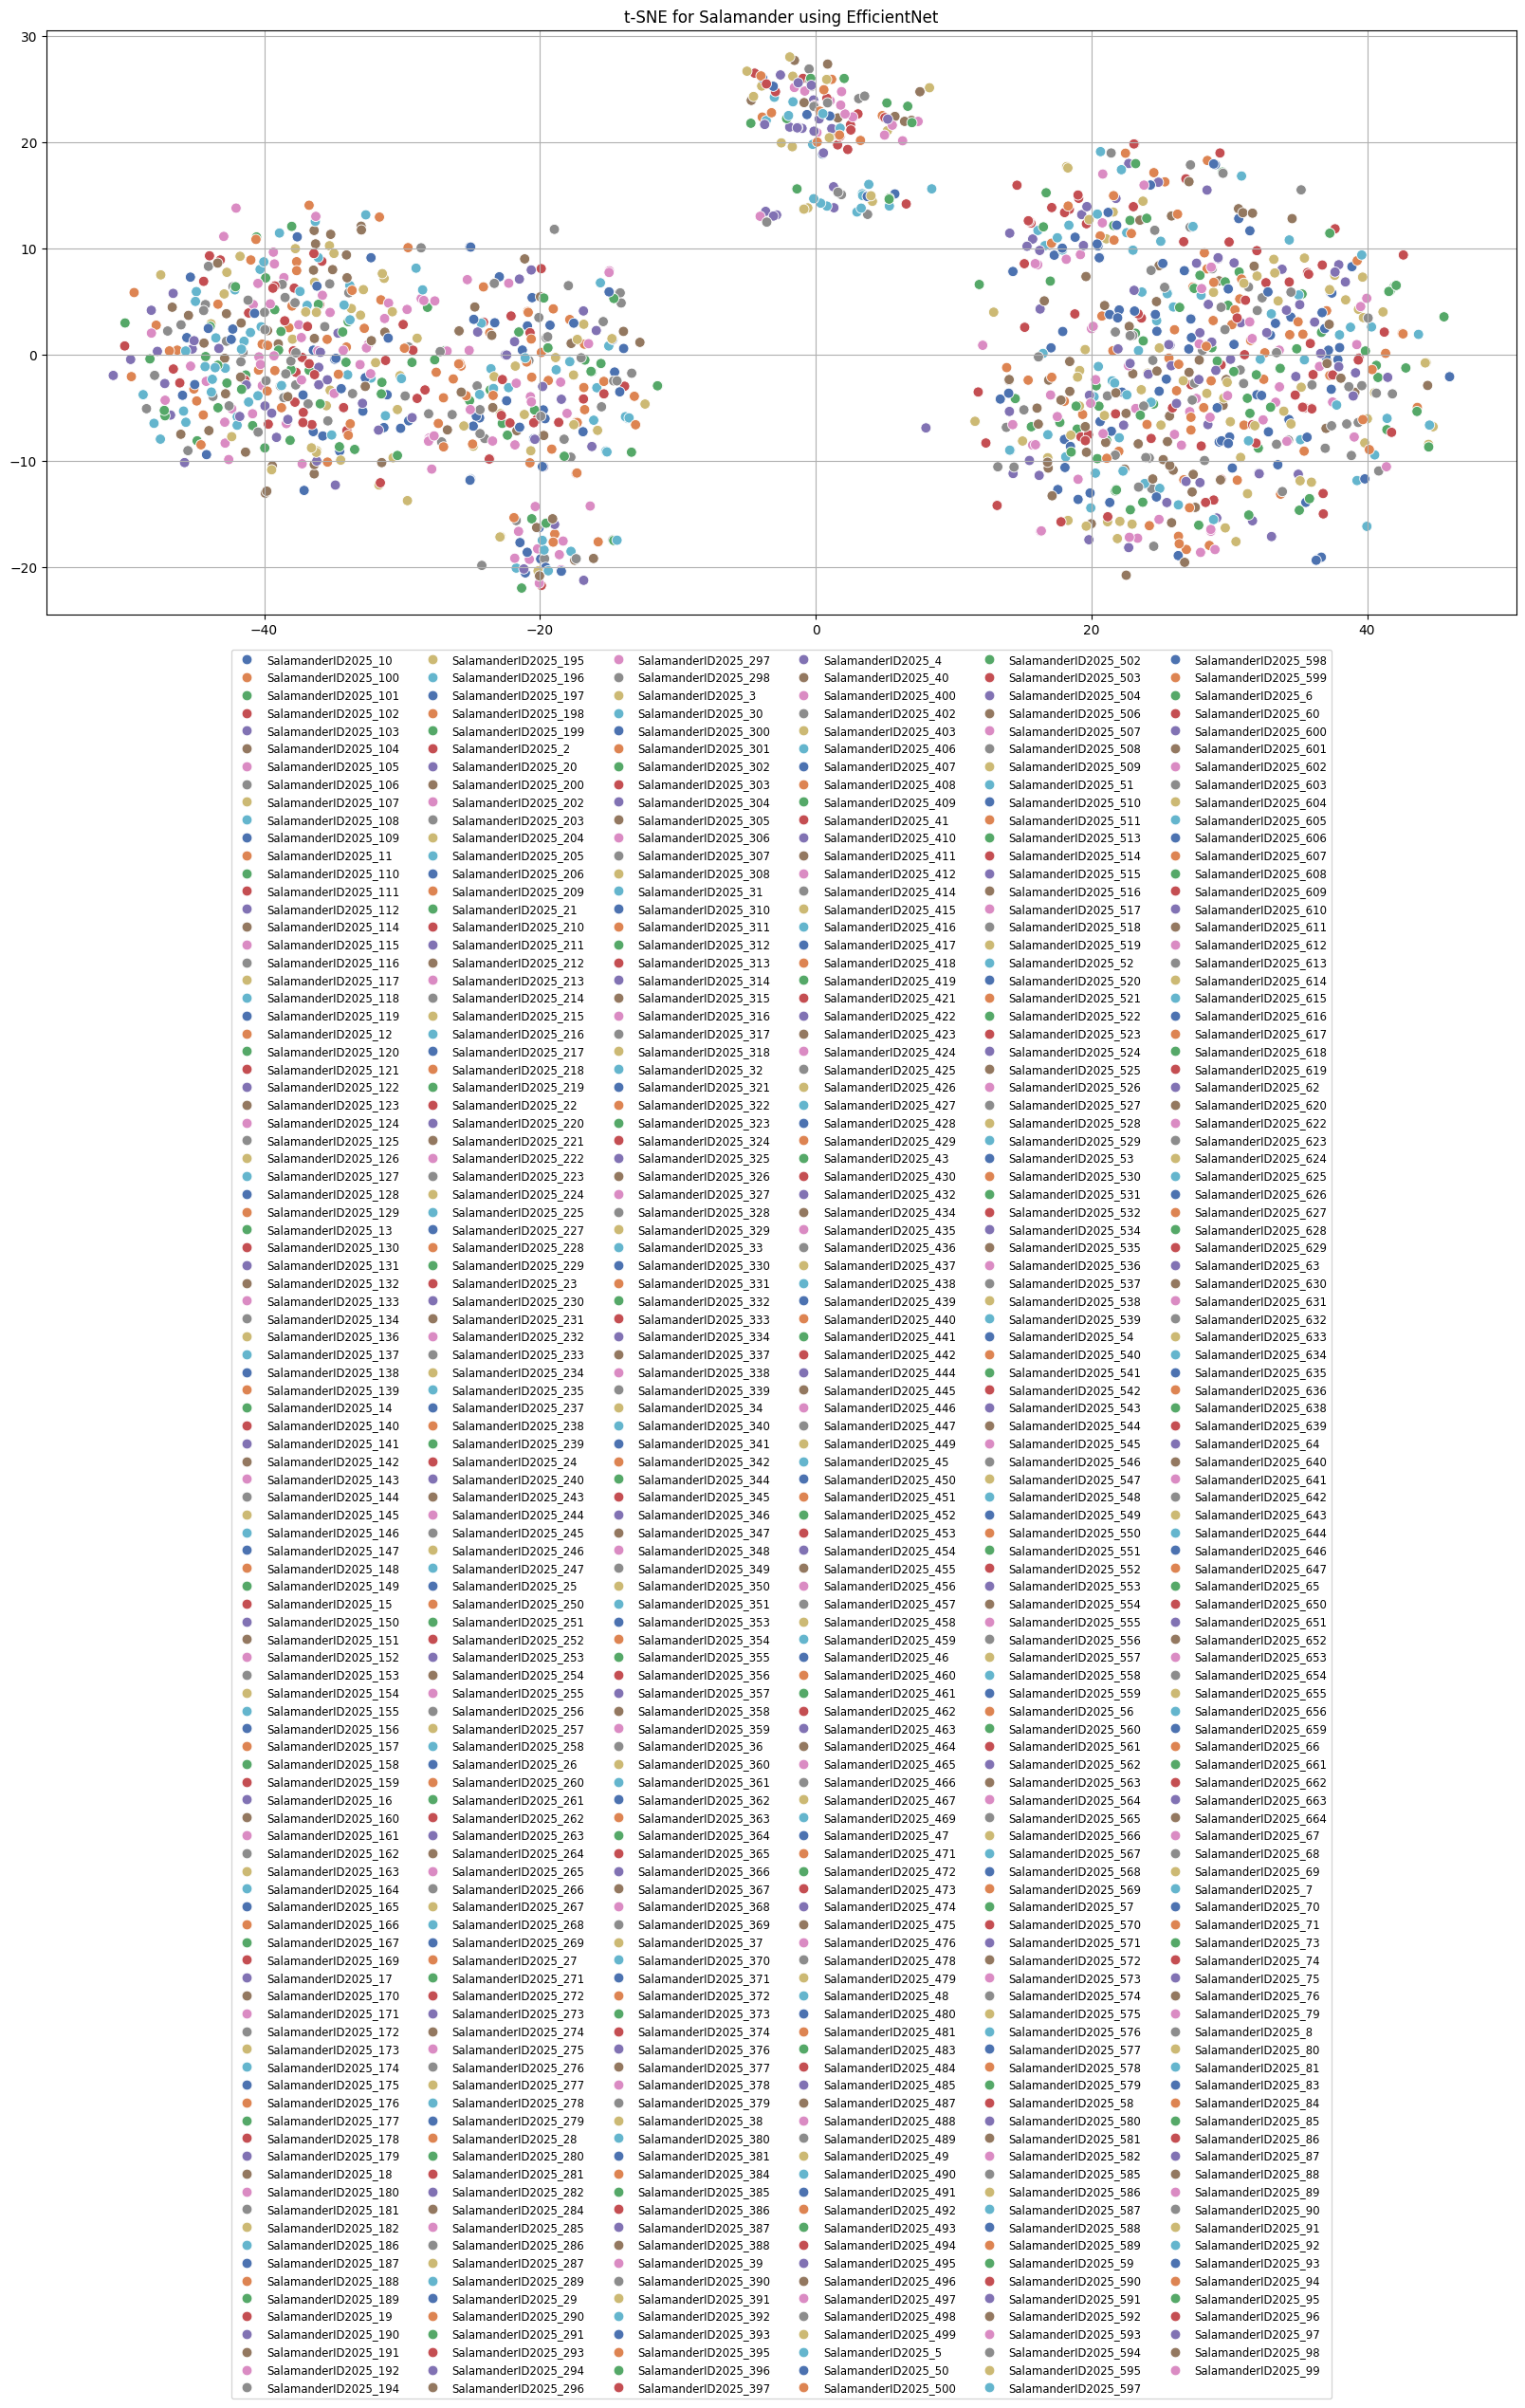

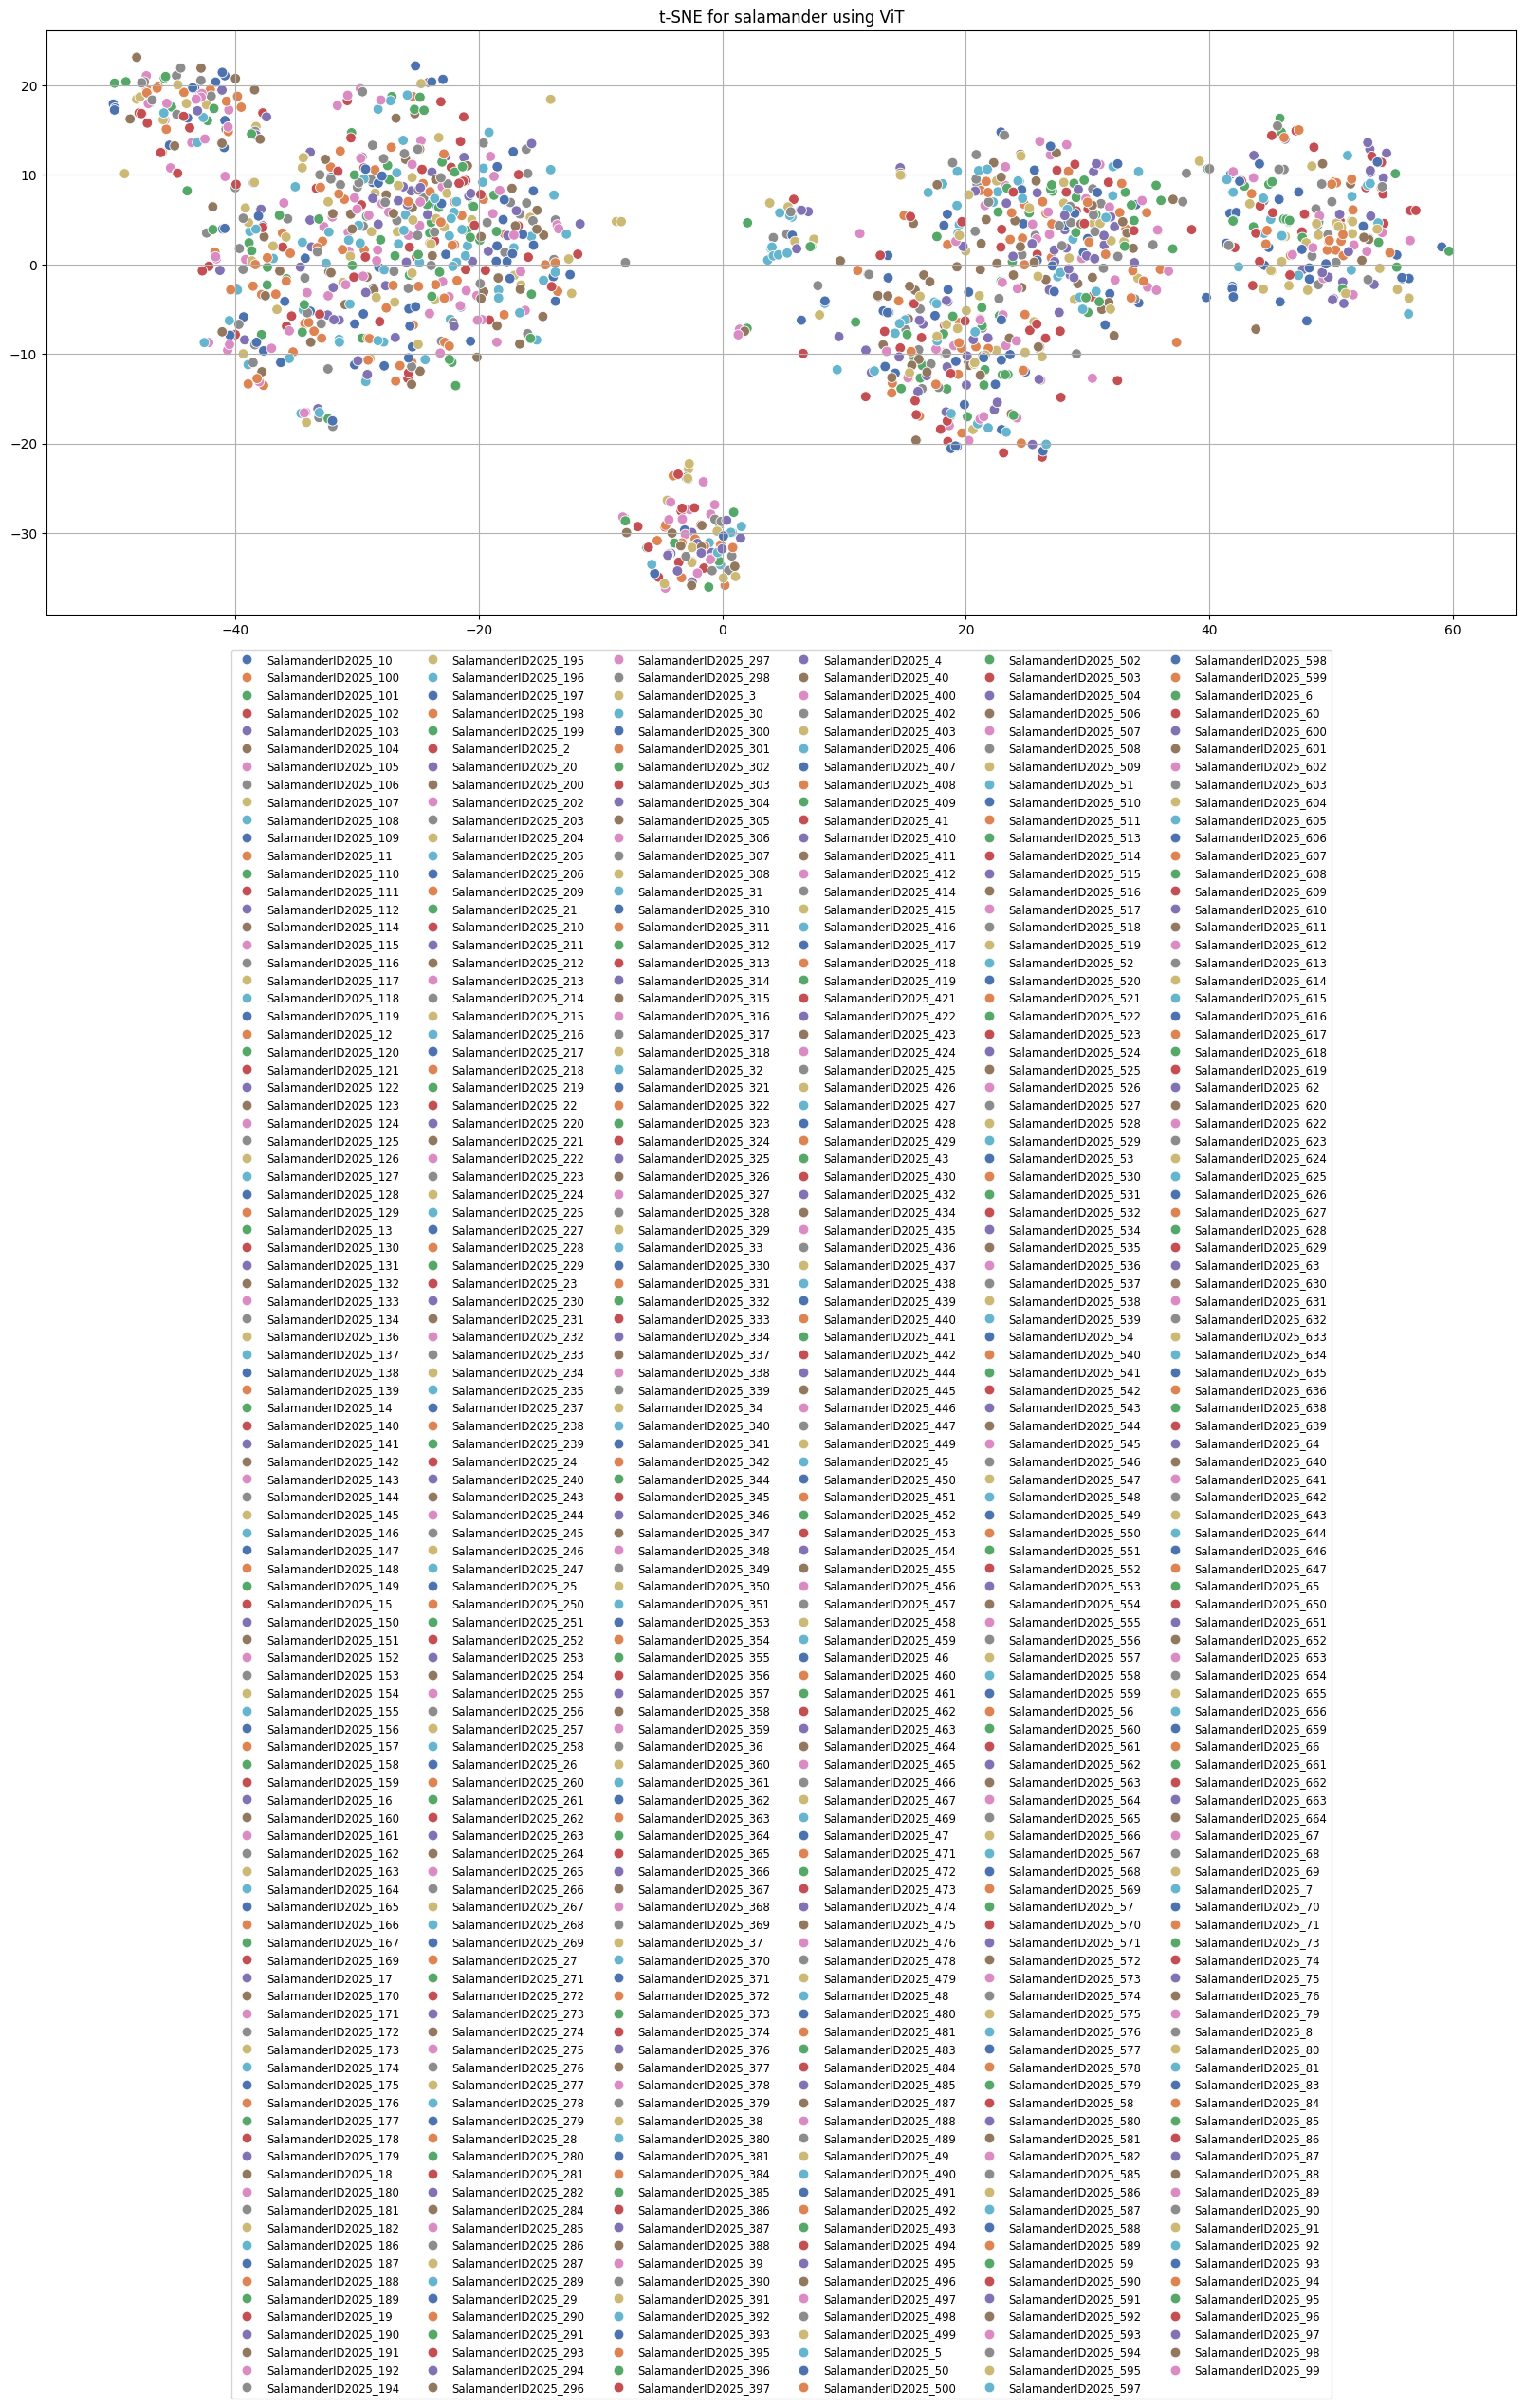

In [100]:
visualize_tsne(salamander_embed_conv, labels=salamander_label, title='t-SNE for Salamander using ConvneXt')
visualize_tsne(salamander_embed_efficient, labels=salamander_label, title='t-SNE for Salamander using EfficientNet')
visualize_tsne(salamander_embed_vit, salamander_label, title='t-SNE for salamander using ViT')

In [101]:
turtle_image, turtle_label = load_images(database_path_turtle)
turtle_image_vit, _ = load_images(database_path_turtle, PIL=True)

Processing t001
Processing t002
Processing t003
Processing t004
Processing t006
Processing t007
Processing t008
Processing t009
Processing t011
Processing t013
Processing t014
Processing t015
Processing t016
Processing t017
Processing t018
Processing t019
Processing t020
Processing t021
Processing t022
Processing t023
Processing t024
Processing t025
Processing t026
Processing t027
Processing t028
Processing t029
Processing t031
Processing t032
Processing t033
Processing t034
Processing t035
Processing t036
Processing t037
Processing t038
Processing t040
Processing t041
Processing t042
Processing t043
Processing t044
Processing t045
Processing t046
Processing t048
Processing t049
Processing t050
Processing t051
Processing t052
Processing t053
Processing t055
Processing t056
Processing t057
Processing t058
Processing t059
Processing t060
Processing t061
Processing t062
Processing t063
Processing t064
Processing t065
Processing t066
Processing t067
Processing t068
Processing t069
Processi

In [ ]:
turtle_embed_efficient = extract_efficient_embedding(turtle_image)

In [105]:
turtle_embed_conv = extract_convnext_embedding(turtle_image)

273/273 ━━━━━━━━━━━━━━━━━━━━ 2537s 9s/step


In [108]:
turtle_embed_vit = extract_vit_embedding(turtle_image_vit)

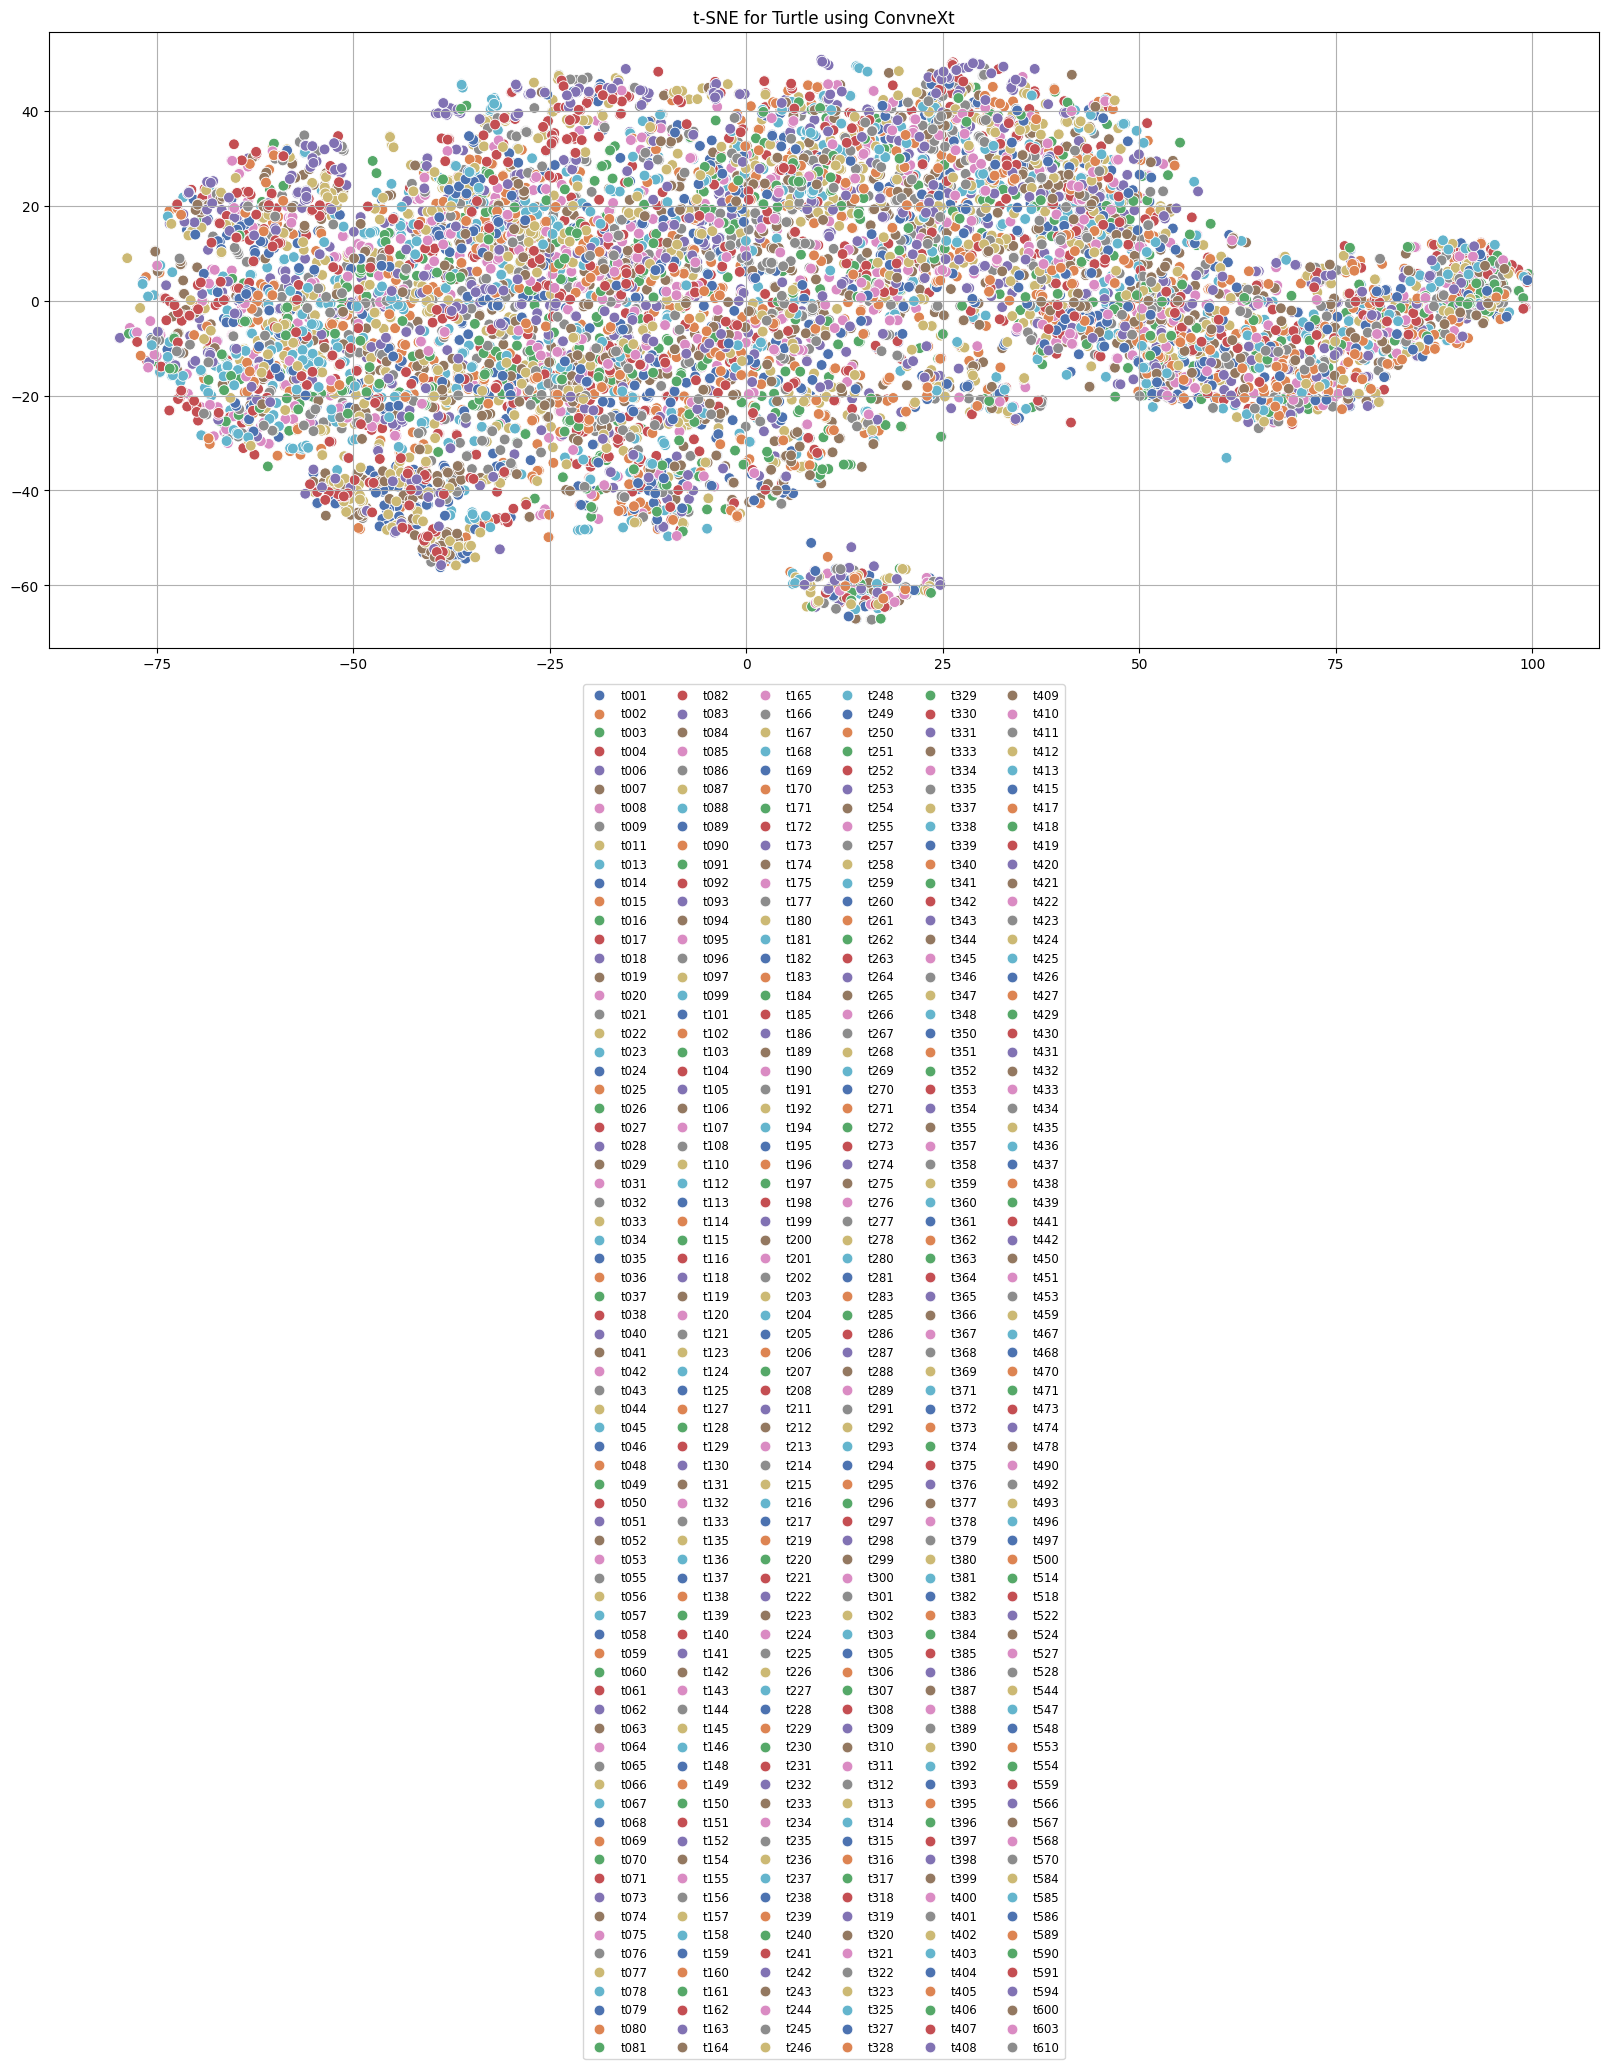

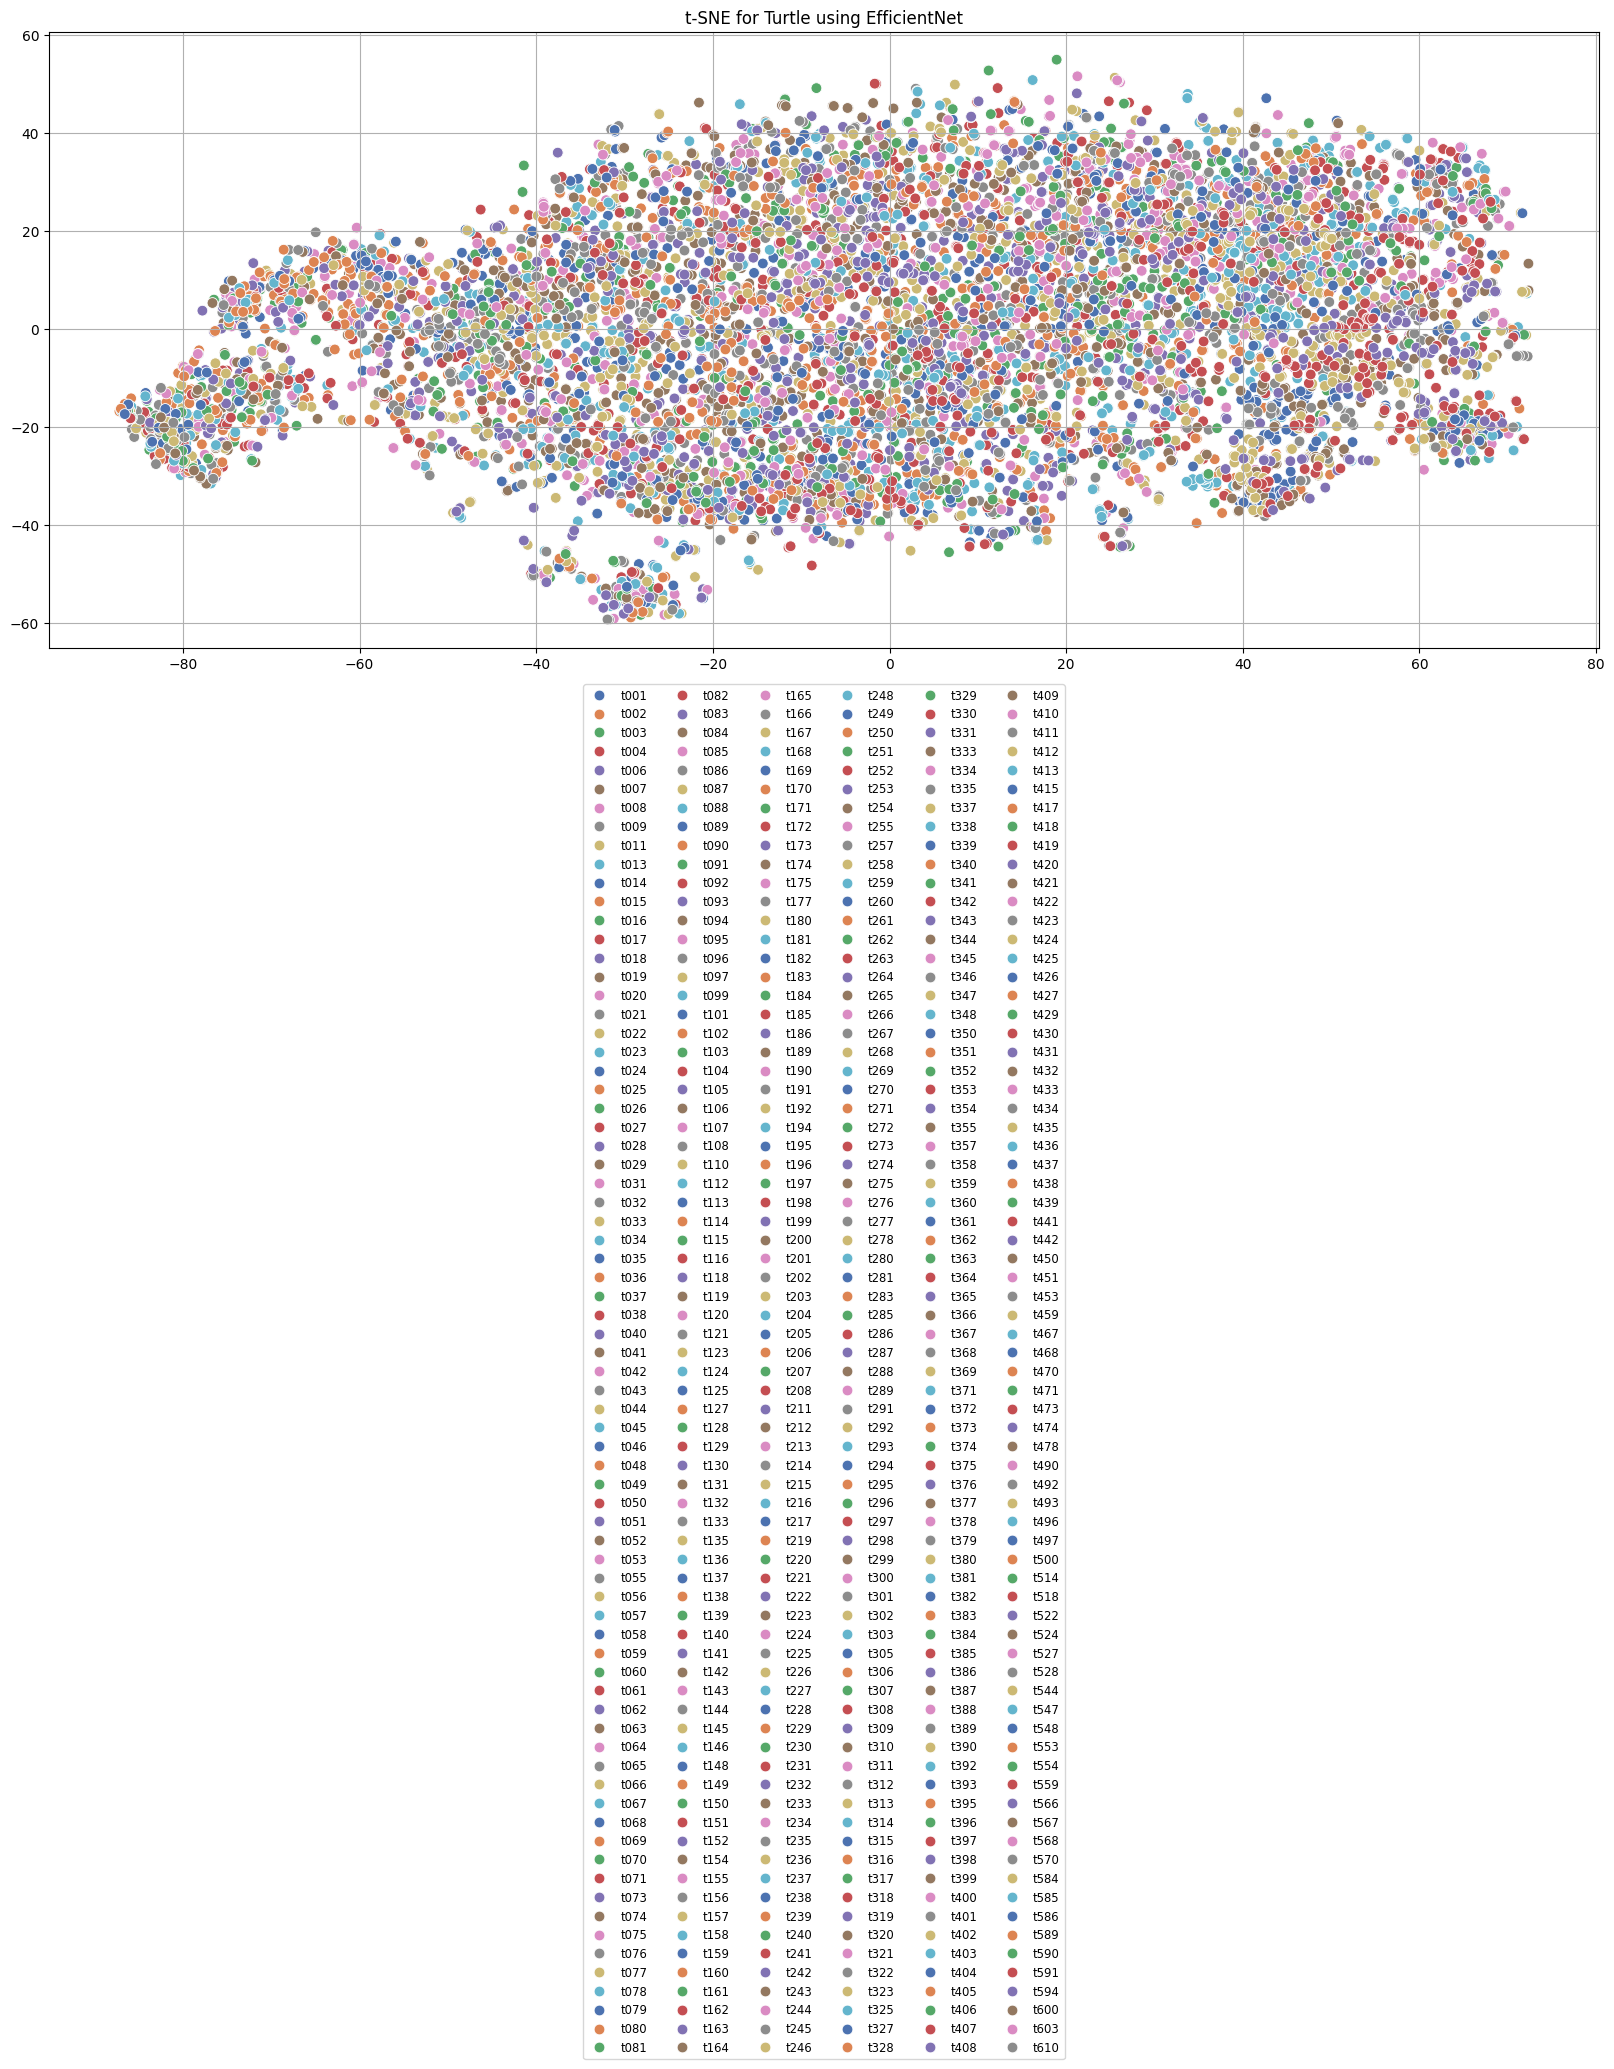

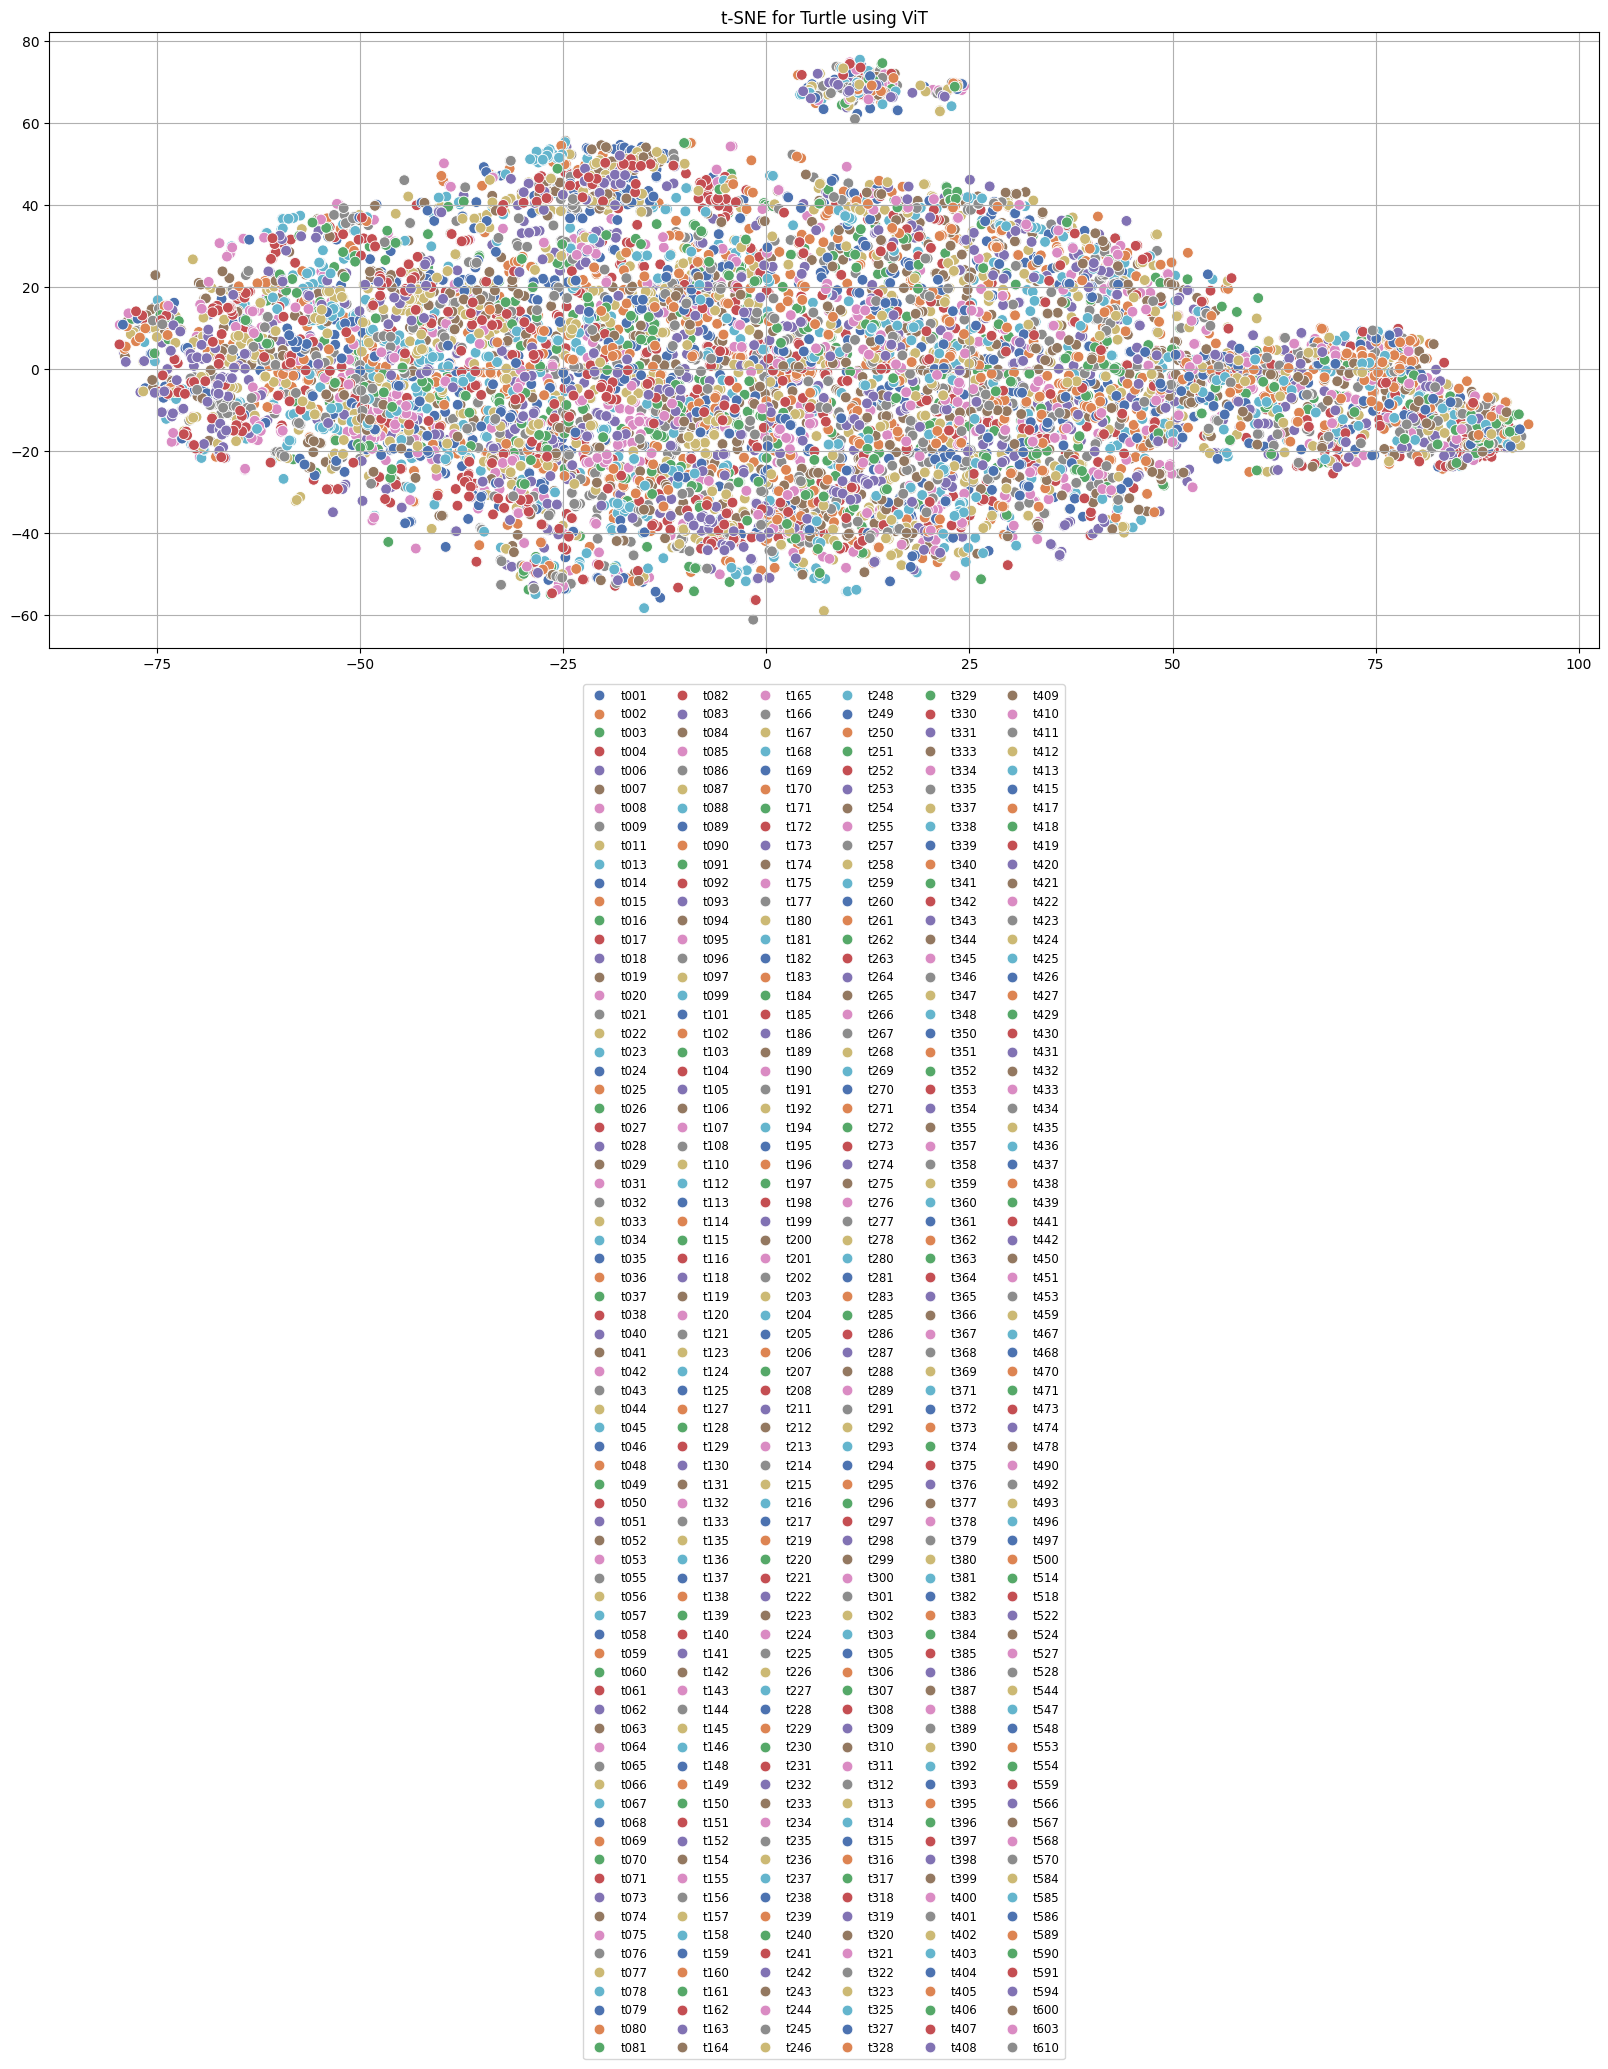

In [109]:
visualize_tsne(turtle_embed_conv, labels=turtle_label, title='t-SNE for Turtle using ConvneXt')
visualize_tsne(turtle_embed_efficient, labels=turtle_label, title='t-SNE for Turtle using EfficientNet')
visualize_tsne(turtle_embed_vit, turtle_label, title='t-SNE for Turtle using ViT')

In [110]:
species_embed =np.vstack([lynx_embed_vit, turtle_embed_vit, salamander_embed_vit])
labels_stack = np.vstack([np.expand_dims(lynx_label, axis=1), np.expand_dims(turtle_label, axis=1), np.expand_dims(salamander_label, axis=1)])

In [111]:
labels_stack = np.squeeze(labels_stack)

In [112]:
species_embed.shape

(13074, 768)

In [113]:
queryData = metaData[metaData.split == 'query'][['image_id', 'path']].copy()

In [114]:
queryData

image_id                                               path
3             3  images/LynxID2025/query/003b89301c7b9f6d18f722...
5             5  images/LynxID2025/query/004d500301a70ec9b5ba08...
12           12  images/LynxID2025/query/00d97c67f0cb0d13a3a449...
13           13  images/LynxID2025/query/00dcbabf03826937bcf6a0...
18           18  images/LynxID2025/query/011d81e0402d1be66bccab...
...         ...                                                ...
15204     15204  images/SeaTurtleID2022/query/images/fecd2dfed0...
15205     15205  images/SeaTurtleID2022/query/images/ff1a0c812b...
15206     15206  images/SeaTurtleID2022/query/images/ff22f1cfa6...
15207     15207  images/SeaTurtleID2022/query/images/ff5d5116d1...
15208     15208  images/SeaTurtleID2022/query/images/ff7f522363...

[2135 rows x 2 columns]

In [ ]:
query_images = []

for query in queryData.path:
    path = os.path.join(root, query)
    image = preprocess_image(path)
    query_images.append(Image.fromarray(image.astype('uint8')))

In [116]:
query_embed = extract_vit_embedding(query_images)
query_embed.shape

(2135, 768)

In [117]:
class AnimalReIdentificationFAISS:
    def __init__(self, mode='cosine', threshold=0.855):
        """
        mode: 'cosine' or 'l2' for similarity/distance measure.
        threshold: cosine similarity or L2 distance threshold.
        """
        self.mode = mode
        self.threshold = threshold
        self.index = None
        self.labels = []

    def _normalize_embeddings(self, embeddings):
        norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
        norms[norms == 0] = 1e-10
        return embeddings / norms

    def fit(self, embeddings: np.ndarray, labels: list):
        embeddings = embeddings.astype('float32')
        if self.mode == 'cosine':
            embeddings = self._normalize_embeddings(embeddings)
            self.index = faiss.IndexFlatIP(embeddings.shape[1]) 
        else:
            self.index = faiss.IndexFlatL2(embeddings.shape[1]) 

        self.index.add(embeddings)
        self.labels = list(labels)
        print(f"[FAISS-{self.mode.upper()}] Index built with {len(labels)} items.")

    def predict(self, query_embedding: np.ndarray):
        if query_embedding.ndim == 1:
            query_embedding = np.expand_dims(query_embedding, axis=0)
        query_embedding = query_embedding.astype('float32')

        if self.mode == 'cosine':
            query_embedding = self._normalize_embeddings(query_embedding)

        D, I = self.index.search(query_embedding, k=1)
        score, idx = D[0][0], I[0][0]

        if self.mode == 'cosine':
            if score < self.threshold:
                return "new_individual"
        else:
            if score > self.threshold:
                return "new_individual"

        return self.labels[idx]

    def predict_batch(self, query_embeddings: np.ndarray):
        query_embeddings = query_embeddings.astype('float32')
        if self.mode == 'cosine':
            query_embeddings = self._normalize_embeddings(query_embeddings)

        D, I = self.index.search(query_embeddings, k=1)
        predictions = []

        for score, idx in zip(D[:, 0], I[:, 0]):
            if (self.mode == 'cosine' and score < self.threshold) or (self.mode == 'l2' and score > self.threshold):
                predictions.append("new_individual")
            else:
                predictions.append(self.labels[idx])

        return predictions


In [128]:
ari_faiss = AnimalReIdentificationFAISS(threshold=0.825)
ari_faiss.fit(species_embed, labels_stack)

[FAISS-COSINE] Index built with 13074 items.


In [129]:
predictions = ari_faiss.predict_batch(query_embed)

In [130]:
predictions

[np.str_('LynxID2025_lynx_32'),
 np.str_('LynxID2025_lynx_54'),
 np.str_('LynxID2025_lynx_33'),
 'new_individual',
 'new_individual',
 'new_individual',
 'new_individual',
 np.str_('LynxID2025_lynx_62'),
 np.str_('LynxID2025_lynx_62'),
 np.str_('LynxID2025_lynx_68'),
 np.str_('LynxID2025_lynx_49'),
 np.str_('LynxID2025_lynx_86'),
 np.str_('LynxID2025_lynx_28'),
 'new_individual',
 'new_individual',
 np.str_('LynxID2025_lynx_38'),
 np.str_('LynxID2025_lynx_49'),
 np.str_('LynxID2025_lynx_97'),
 np.str_('LynxID2025_lynx_77'),
 'new_individual',
 'new_individual',
 np.str_('LynxID2025_lynx_49'),
 np.str_('LynxID2025_lynx_49'),
 np.str_('LynxID2025_lynx_93'),
 np.str_('LynxID2025_lynx_74'),
 np.str_('LynxID2025_lynx_49'),
 'new_individual',
 np.str_('LynxID2025_lynx_43'),
 np.str_('LynxID2025_lynx_05'),
 np.str_('LynxID2025_lynx_11'),
 'new_individual',
 np.str_('LynxID2025_lynx_62'),
 np.str_('LynxID2025_lynx_54'),
 np.str_('LynxID2025_lynx_45'),
 'new_individual',
 np.str_('LynxID2025_ly

In [131]:
D, I = ari_faiss.index.search(query_embed, k=1)
print("Min Distance:", D.min())
print("Max Distance:", D.max())
print("Mean Distance:", D.mean())

Min Distance: 19.312836
Max Distance: 41.41472
Mean Distance: 26.827719


In [132]:
queryData['identity'] = [str(item) if isinstance(item, np.str_) else item for item in predictions]

In [133]:
queryData

image_id                                               path  \
3             3  images/LynxID2025/query/003b89301c7b9f6d18f722...   
5             5  images/LynxID2025/query/004d500301a70ec9b5ba08...   
12           12  images/LynxID2025/query/00d97c67f0cb0d13a3a449...   
13           13  images/LynxID2025/query/00dcbabf03826937bcf6a0...   
18           18  images/LynxID2025/query/011d81e0402d1be66bccab...   
...         ...                                                ...   
15204     15204  images/SeaTurtleID2022/query/images/fecd2dfed0...   
15205     15205  images/SeaTurtleID2022/query/images/ff1a0c812b...   
15206     15206  images/SeaTurtleID2022/query/images/ff22f1cfa6...   
15207     15207  images/SeaTurtleID2022/query/images/ff5d5116d1...   
15208     15208  images/SeaTurtleID2022/query/images/ff7f522363...   

                 identity  
3      LynxID2025_lynx_32  
5      LynxID2025_lynx_54  
12     LynxID2025_lynx_33  
13         new_individual  
18         new_individual  
...                   ...  
15204                t490  
15205      new_individual  
15206                t319  
15207      new_individual  
15208                t082  

[2135 rows x 3 columns]

In [134]:
queryData[['image_id', 'identity']].to_csv('submissionFAISS.csv', index=False)